**CODSOFT INTERNSHIP**


**TASK 4 : SALES PREDICTION**

---

**TASK DESCRIPTION:**


*  Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.
* In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on
the journey of sales prediction using machine learning in Python.


---

Importing Libraries :

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

Loading the Dataset :

In [2]:
data_file = pd.read_csv("advertising.csv")

Checking the Initial Data :

In [12]:
data_file.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Checking for the Summary :

In [13]:
data_file.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Checking for missing data :

In [14]:
data_file.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


Graph for Distribution Analysis :

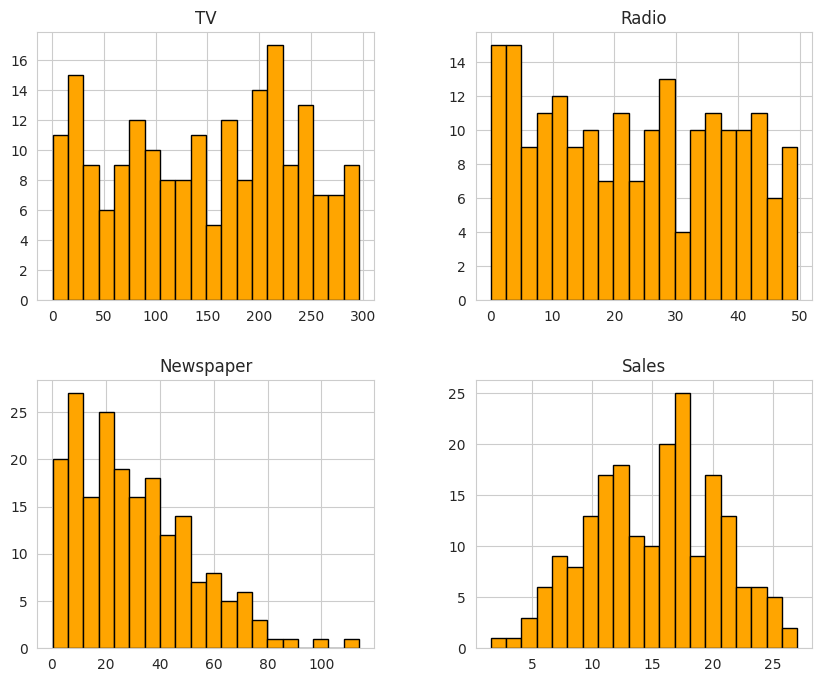

In [17]:
sns.set_style("whitegrid")
data_file.hist(bins=20, figsize=(10, 8), color='orange', edgecolor='black')
plt.show()

Correlation Heatmap :

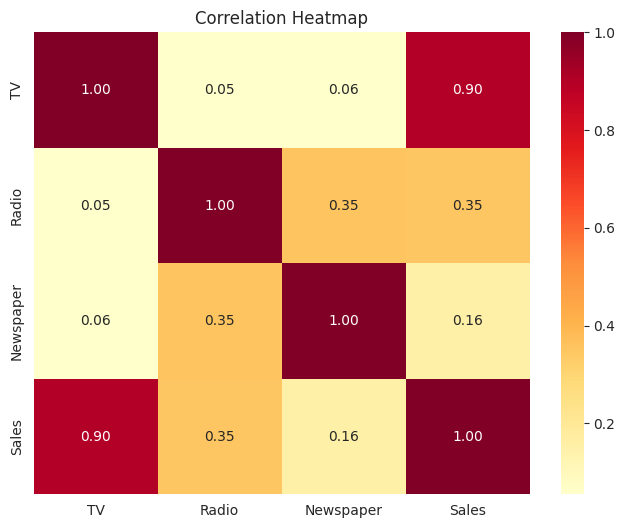

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_file.corr(), annot=True, cmap='YlOrRd', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Graph of Actual Sales vs Predicted Sales :

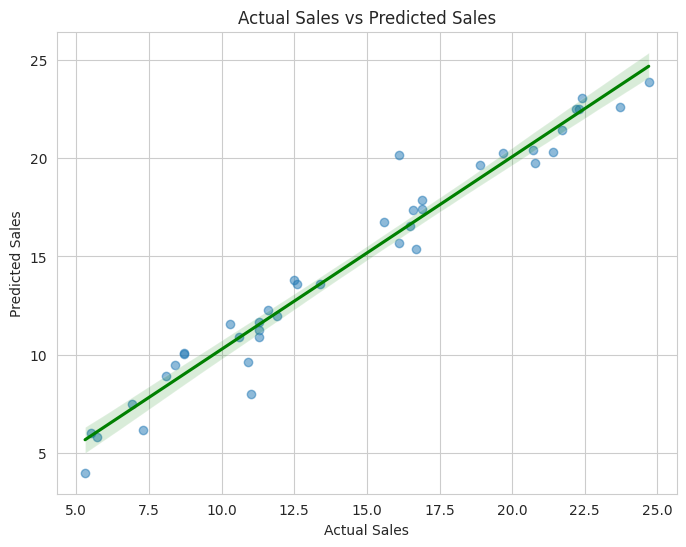

In [22]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=predictions, scatter_kws={'alpha':0.5}, line_kws={'color':'g'})
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs Predicted Sales")
plt.show()

Training the Model :

In [15]:
x = data_file.drop(columns='Sales')
y = data_file['Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Feature Scaling :

In [4]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Training the Gradient Boosting Regressor :

In [7]:
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(x_train_scaled, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=42)

Model Prediction and Evaluation :

In [9]:
predictions = model.predict(x_test_scaled)

accuracy = r2_score(y_test, predictions) * 100
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Model Accuracy (R2 Score): {accuracy:.2f}%")
print(f"Root Mean Squared Error: {rmse:.4f}")

Model Accuracy (R2 Score): 95.80%
Root Mean Squared Error: 1.1397
